In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from customxgboost import XGBoostClassifier, XGBoostTree
from fedXGB import Client, FedXGBoost
from customxgboost import XGBoostClassifier as myxgb


In [2]:
# Generate dummy data
def create_dummy_data(n_samples = 13000, n_features = 50, n_informative = 22, n_redundant = 0, random_state = 42):

    # Create the dataset
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        n_classes=2,
        random_state=random_state
    )

    # Convert to DataFrame for convenience
    df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
    df['label'] = y

    return df

In [3]:
data = create_dummy_data()

In [4]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,label
0,-0.388764,-0.294324,-1.449371,-1.643394,-1.204968,0.490690,-0.098419,1.572496,-0.581586,-1.354834,...,-4.322910,1.048581,5.360943,-0.934561,-0.848637,-2.394518,-0.389353,-0.031463,0.151734,0
1,1.235148,-0.612829,-1.266563,-1.501093,0.047110,-0.515642,-1.316561,1.405212,0.051058,1.178490,...,-0.314992,-1.195173,5.981902,-0.572279,0.218169,-0.819838,0.957233,0.310591,0.259068,0
2,2.951007,1.917902,-0.769232,-2.377278,-1.844964,5.780315,-0.387116,-0.070980,2.444527,0.970518,...,1.394747,2.370366,0.546856,0.073509,1.233175,2.245180,-0.765060,1.738901,-1.831106,1
3,0.080822,-0.647951,1.270336,2.199872,-0.271813,3.241101,-0.791617,-1.341530,-0.354356,-4.951116,...,-0.527104,6.486208,-2.870269,0.258533,0.099422,-2.338951,-1.413121,-0.138444,-0.798014,0
4,-0.347365,0.988844,-0.513339,-2.270837,-1.438866,-0.329499,0.656930,-0.265301,1.881920,-2.286512,...,0.940610,1.704042,0.395011,-0.328285,0.452352,1.469964,0.200438,1.035008,0.088308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,1.277433,-0.010659,0.869364,-3.979315,0.449194,3.405354,-0.813716,0.500592,-0.048998,0.402151,...,-2.149796,-1.910237,-3.118652,0.041227,0.519205,-3.606206,-0.791230,-0.844942,0.117368,1
12996,0.308969,-5.110540,-0.887266,-1.401633,-0.005547,-2.750548,-1.070792,0.627263,0.426700,-1.137791,...,1.311013,7.936694,-1.901601,-0.162988,1.114487,0.110868,0.237756,-1.521590,0.300129,0
12997,0.914876,0.217497,-1.781741,-2.632218,0.789332,-1.334079,-1.286616,-0.847273,-0.332294,-0.889213,...,-3.243937,2.261750,0.116821,-0.393655,-0.374380,0.703279,-0.224176,0.125252,-0.177978,1
12998,-0.123517,5.884214,0.524983,3.209779,-0.320098,1.983649,0.800674,0.939940,-1.823100,1.651198,...,-1.149301,1.327993,3.079916,-0.510651,0.975273,-0.042056,-1.094833,-0.323190,0.224345,0


In [5]:
# split data into train and test sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit model no training data
model = xgb.XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.3)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.15%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

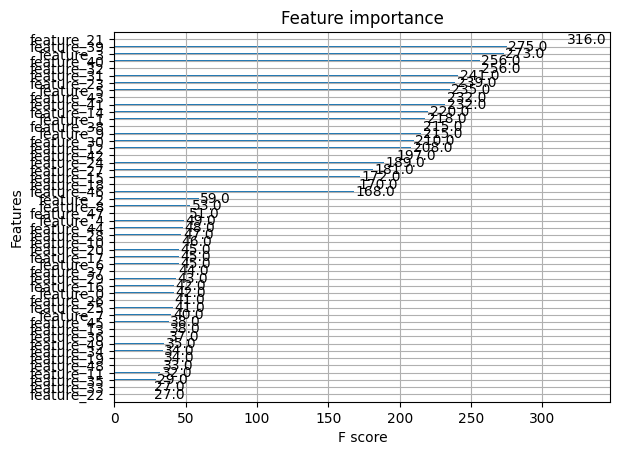

In [6]:
# plot feature importance
xgb.plot_importance(model)

In [7]:


# my_model = myxgb()
# my_model.fit(X_train, y_train, boosting_rounds=3, depth=10, learning_rate=0.3, subsample_cols=1, gamma=1, lambda_=1, min_child_weight=1)

# # make predictions for test data
# y_pred = my_model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [8]:
# # accuracy on training data
# y_pred = my_model.predict(X_train)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_train, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [9]:
my_model = myxgb(method='hist')
my_model.fit(X_train, y_train, boosting_rounds=100, depth=10, avg_splits=3, features_per_booster=5, learning_rate=0.3, gamma=1, lambda_=1, min_child_weight=1)

# make predictions for test data
y_pred = my_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Getting regions
Booster 1 complete
Getting regions
Booster 2 complete
Getting regions
Booster 3 complete
Getting regions
Booster 4 complete
Getting regions
Booster 5 complete
Getting regions
Booster 6 complete
Getting regions
Booster 7 complete
Getting regions
Booster 8 complete
Getting regions
Booster 9 complete
Getting regions
Booster 10 complete
Getting regions
Booster 11 complete
Getting regions
Booster 12 complete
Getting regions
Booster 13 complete
Getting regions
Booster 14 complete
Getting regions
Booster 15 complete
Getting regions
Booster 16 complete
Getting regions
Booster 17 complete
Getting regions
Booster 18 complete
Getting regions
Booster 19 complete
Getting regions
Booster 20 complete
Getting regions
Booster 21 complete
Getting regions
Booster 22 complete
Getting regions
Booster 23 complete
Getting regions
Booster 24 complete
Getting regions
Booster 25 complete
Getting regions
Booster 26 complete
Getting regions
Booster 27 complete
Getting regions
Booster 28 complete
G

In [10]:
# accuracy on training data
y_pred = my_model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.93%


In [18]:
my_model.feature_splits

{0: [-0.6849418683794829, -0.03373520388988471, 0.6739987355987573],
 1: [-3.1063124745939312,
  -1.3825036479737574,
  0.00023031391866412676,
  1.3604947065942365,
  3.0728975026253016],
 2: [-0.0029388641382910924],
 3: [-3.3247348838645796,
  -1.9800118683243666,
  -0.9332131952325322,
  0.06388949427296094,
  1.1187046999925367,
  2.4480401548216326],
 4: [0.002271232167289283],
 5: [-0.8178942898706347, 0.9781030068715535, 2.689675989152959],
 6: [0.006840550941916198],
 7: [-0.002353942641541651],
 8: [-0.43195279671326126, 0.42608874821147724],
 9: [-2.8576418674860244,
  -1.1807077167087567,
  0.2042645219043148,
  1.871159531698048],
 10: [0.013769884055262919],
 11: [-0.01795777969498964],
 12: [-2.9209567262054015,
  -1.2614905394351754,
  0.268201964539541,
  1.913946162314838],
 13: [0.0032644083322191935],
 14: [-2.5648411056950837,
  -0.786345615376055,
  0.7562965410125849,
  2.6074193978568223],
 15: [-2.5996896226820687,
  -1.0702829953131598,
  -0.005190633998302622

In [19]:
fed_model.feature_splits

{0: [-0.6849439867645329, -0.003414272714985077, 0.6956739954190199],
 1: [-3.144627779722738,
  -1.4342770442205939,
  -0.010242807053139822,
  1.318800799476919,
  3.0540769814257347],
 2: [-0.40263978321710236, 0.4226308960161111],
 3: [-3.1077984183742298,
  -1.643741330075231,
  -0.46547719585447467,
  0.6730645481493138,
  2.0692024419142556],
 4: [-0.43989731831382456, 0.4263265043786853],
 5: [-0.8466307447952611, 1.0061356641986847, 2.704138635198751],
 6: [0.018689855946528618],
 7: [0.019420017393696722],
 8: [-0.45241223484111237, 0.39537115992299715],
 9: [-2.8754263032970977,
  -1.1778131405400785,
  0.2126143800320441,
  1.8405234127694416],
 10: [-0.3957851136819032, 0.44144998671416297],
 11: [-0.018991273248337638],
 12: [-2.4926487613658947, -0.5405673722213842, 1.410766969946439],
 13: [0.026080875405776707],
 14: [-2.0891395449316876, -0.09837970989472104, 2.0384017261217267],
 15: [-2.607262132966043,
  -1.0581385108320651,
  0.014235485055852131,
  1.120229278122

<BarContainer object of 50 artists>

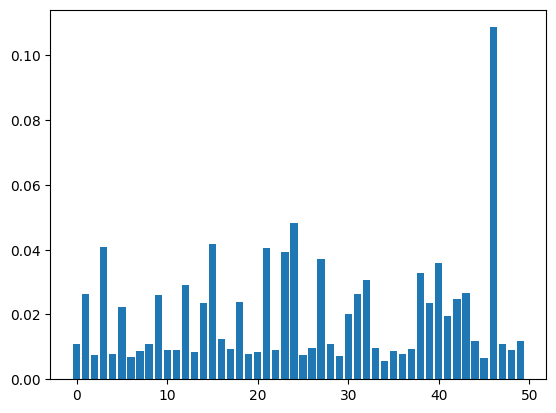

In [20]:
feature_importance = my_model.feature_importance

features = feature_importance.keys()
values = feature_importance.values()

# plot feature importance
plt.bar(features, values)

<BarContainer object of 50 artists>

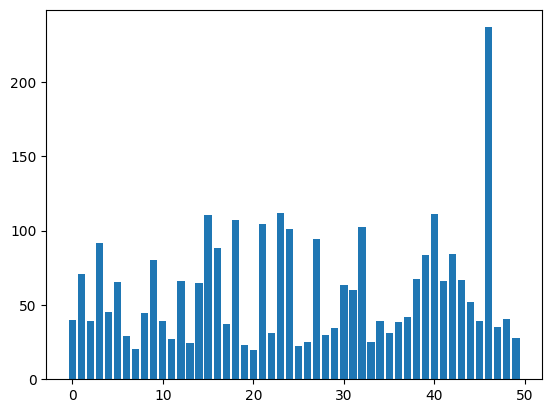

In [21]:
feature_importance = fed_model.feature_importance

features = feature_importance.keys()
values = feature_importance.values()

# plot feature importance
plt.bar(features, values)

In [15]:
# max_bins = 100000 # each client must have the same bin size

# create 3 clients
client1 = Client(X_train[:3000], y_train[:3000], cliend_id=1)
client2 = Client(X_train[3000:6000], y_train[3000:6000], cliend_id=2)
client3 = Client(X_train[6000:], y_train[6000:], cliend_id=3)

# create a federated model with the 3 clients
fed_model = FedXGBoost()

# fed_model.fit([client1, client2, client3], avg_splits=3)

fed_model.fit([client1], avg_splits=3)

Initializing Clients


In [22]:
# train the model
fed_model.train(boosting_rounds=100, depth=10, learning_rate=0.1, features_per_booster=7)

Getting regions
Boosting round 1 done.
Getting regions
Boosting round 2 done.
Getting regions
Boosting round 3 done.
Getting regions
Boosting round 4 done.
Getting regions
Boosting round 5 done.
Getting regions
Boosting round 6 done.
Getting regions
Boosting round 7 done.
Getting regions
Boosting round 8 done.
Getting regions
Boosting round 9 done.
Getting regions
Boosting round 10 done.
Getting regions
Boosting round 11 done.
Getting regions
Boosting round 12 done.
Getting regions
Boosting round 13 done.
Getting regions
Boosting round 14 done.
Getting regions
Boosting round 15 done.
Getting regions
Boosting round 16 done.
Getting regions
Boosting round 17 done.
Getting regions
Boosting round 18 done.
Getting regions
Boosting round 19 done.
Getting regions
Boosting round 20 done.
Getting regions
Boosting round 21 done.
Getting regions
Boosting round 22 done.
Getting regions
Boosting round 23 done.
Getting regions
Boosting round 24 done.
Getting regions
Boosting round 25 done.
Getting r

In [23]:
# predictions for 25 rounds
preds = fed_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.8794871794871795
Precision: 0.8416631667366653
Recall: 0.9347014925373134
F1 Score: 0.8857458563535912


In [3]:
# Ultimate test
total_data = 100000

data = create_dummy_data(n_samples = total_data, n_features = 50, n_informative = 22)


In [4]:
# split data into train and test sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit model no training data
model = xgb.XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.3)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.15%


In [5]:
# Total data points
num_clients = 57

# Generate random weights
weights = np.random.rand(num_clients)

# Normalize weights to sum to 1
weights /= weights.sum()

# Compute the sizes of data for each client
sizes = (weights * total_data).astype(int)

# Adjust the sizes to ensure the sum is exactly 100000 (accounting for rounding errors)
sizes[-1] += total_data - sizes.sum()

# Verify the sizes sum to total_data
assert sizes.sum() == total_data, "Sizes do not sum up to the total data points!"

# Print the sizes for each client
print("Data sizes for each client:", sizes)

# Create clients with unevenly distributed data
clients = []
start = 0
for i, size in enumerate(sizes):
    end = start + size
    client = Client(X_train[start:end], y_train[start:end], i)
    clients.append(client)
    start = end

# Verify client data is correctly assigned
print("Number of clients:", len(clients))


Data sizes for each client: [ 764  477 1257 2077  474 1611 1648 2809 1808 3099 2631   28 2039 2928
 2762 3261  640 2418  929  774 3290 2516 2859 1638 2454 2498  669 2722
 1550 2664 1047 3109 2599 1698   30 2335 2849 1040  153 2779 3185 2167
 2152 2653 1095  772 1566 1544  183 1680 2431 1147  771  634 1498   72
 1517]
Number of clients: 57


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:29:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:52: Empty dataset at worker: 0
  warnings.warn(smsg, UserWarning)


In [6]:

# create a federated model with the 3 clients
fed_model = FedXGBoost()

# fed_model.fit([client1, client2, client3], avg_splits=3)

fed_model.fit(clients, avg_splits=3)

Initializing Clients


In [7]:
# train the model
fed_model.train(boosting_rounds=100, depth=10, learning_rate=0.1, features_per_booster=5)

Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Getting regions
Boosting round 1 done.
Getting regions
Getting regions
Getting regions
Getting regions
G

In [8]:
# predictions for 25 rounds
preds = fed_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.906
Precision: 0.869239250275634
Recall: 0.9557522123893806
F1 Score: 0.9104451758184653
